# OAS-hepB Data Overview

In [1]:
# Retina quality plots
%config InlineBackend.figure_format = 'retina'

## Load data

In [2]:
import os
import gzip
import json
import pandas as pd

METADATA_DIR = 'data/meta'
UNITS_LISTS_DIR = METADATA_DIR + '/units-list'
SEQ_DIR = 'data/seq'
UNITS_LIST_FILE_EXT = '.txt'
DATAUNIT_FILE_EXT = '.parquet'
METADATA_FILE_EXT = '.parquet'

def load_data(study):
    """
    Loads data from given study.
    
    Args:
        study    name of a study to be loaded.

    Returns:
        dataframe of sequences and metadata from given study and dataframe
        consisting of dataunits metadata from given study.
    """
    
    dataunits_list_path = f'{UNITS_LISTS_DIR}/{study}{UNITS_LIST_FILE_EXT}'

    with open(dataunits_list_path) as dataunits_list_file:
        dataunits = [line.strip() for line in dataunits_list_file.readlines()]

    ddfs = []
    meta_dfs = []
    for dataunit in dataunits:
        data_path = f'{SEQ_DIR}/{study}/{dataunit}{DATAUNIT_FILE_EXT}'
        df = pd.read_parquet(data_path)
        
        metadata_path = f'{METADATA_DIR}/{study}/{dataunit}{METADATA_FILE_EXT}'
        meta_df = pd.read_parquet(metadata_path)
        
        for col in meta_df.columns:
            df[col] = meta_df[col][0]

        ddfs.append(df)
        meta_dfs.append(meta_df)
    
    data = pd.concat(ddfs, axis=0)
    metadata = pd.concat(meta_dfs, axis=0)

    return data, metadata

In [3]:
STUDIES = ['Galson_2015a', 'Galson_2016']

In [4]:
# Parameters
STUDIES = ["Galson_2015a"]


In [5]:
data_dfs, metadata_dfs = map(list, list(zip(*[load_data(study) for study in STUDIES])))

data = pd.concat(data_dfs)
metadata = pd.concat(metadata_dfs)

In [6]:
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14738476 entries, 0 to 259303
Data columns (total 24 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   num_errors     object
 1   redundancy     int64 
 2   name           int64 
 3   seq            object
 4   v              object
 5   cdr3           object
 6   original_name  object
 7   errors         object
 8   j              object
 9   data           object
 10  Longitudinal   object
 11  Chain          object
 12  Author         object
 13  Isotype        object
 14  Age            object
 15  Size_igblastn  int64 
 16  Disease        object
 17  Link           object
 18  BSource        object
 19  BType          object
 20  Size           int64 
 21  Species        object
 22  Vaccine        object
 23  Subject        object
dtypes: int64(4), object(20)
memory usage: 2.7+ GB


,num_errors,redundancy,name,seq,v,cdr3,original_name,errors,j,data,...,Age,Size_igblastn,Disease,Link,BSource,BType,Size,Species,Vaccine,Subject
0,3,1,1,SLRLSCAVSGFTFSVYGMHWVRQVPGKGLEWVAQIKYDGSKVDYRD...,IGHV3-33*03,VKGRYRGYELGY,121711,"[('88', 'T'), ('55', 'Q'), ('36', 'V')]",IGHJ4*01,"{""fwh1"": {""24"": ""A"", ""25"": ""V"", ""26"": ""S"", ""20...",...,28,201959,None,https://www.sciencedirect.com/science/article/...,PBMC,HepB+B-cells,178996,human,HepB,Subject-1776
1,1,1,2,SLRLSCAASGFTFSTFSMHWVRQAPGKGLEWLAGISSDGSNKDKPD...,IGHV3-30*03,ARSKGTLMVLPLDY,123196,"[('67', 'K')]",IGHJ2*01,"{""fwh1"": {""24"": ""A"", ""25"": ""A"", ""26"": ""S"", ""20...",...,28,201959,None,https://www.sciencedirect.com/science/article/...,PBMC,HepB+B-cells,178996,human,HepB,Subject-1776
2,2,1,3,SLRLSCAASGFPFNNAWMTWVRQAPGMGLEWVGRIKSKTDGETTDY...,IGHV3-15*01,TTDVYYSTYWSWLDP,69714,"[('100', 'T'), ('48', 'M')]",IGHJ5*02,"{""fwh1"": {""24"": ""A"", ""25"": ""A"", ""26"": ""S"", ""20...",...,28,201959,None,https://www.sciencedirect.com/science/article/...,PBMC,HepB+B-cells,178996,human,HepB,Subject-1776
3,2,1,4,SVKVSCKASGFTFTSSTMQWVRQARGQRLEWRGWVVVGSDNTNYAH...,IGHV1-58*02,AASTHSSSWYSLVYYYAVDV,198459,"[('82', 'V'), ('53', 'R')]",IGHJ6*02,"{""fwh1"": {""24"": ""K"", ""25"": ""A"", ""26"": ""S"", ""20...",...,28,201959,None,https://www.sciencedirect.com/science/article/...,PBMC,HepB+B-cells,178996,human,HepB,Subject-1776
4,0,1,5,VKVSCKASGYTFTTYGISWVRQAPGQGLEWVGWINPYNGGINYAQK...,IGHV1-18*04,ARGPYFGELTGILVLQH,81578,[None],IGHJ1*01,"{""fwh1"": {""24"": ""K"", ""25"": ""A"", ""26"": ""S"", ""20...",...,28,201959,None,https://www.sciencedirect.com/science/article/...,PBMC,HepB+B-cells,178996,human,HepB,Subject-1776


In [7]:
metadata.info()
metadata.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 107 entries, 0 to 0
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Longitudinal   107 non-null    object
 1   Chain          107 non-null    object
 2   Author         107 non-null    object
 3   Isotype        107 non-null    object
 4   Age            107 non-null    object
 5   Size_igblastn  107 non-null    int64 
 6   Disease        107 non-null    object
 7   Link           107 non-null    object
 8   BSource        107 non-null    object
 9   BType          107 non-null    object
 10  Size           107 non-null    int64 
 11  Species        107 non-null    object
 12  Vaccine        107 non-null    object
 13  Subject        107 non-null    object
dtypes: int64(2), object(12)
memory usage: 12.5+ KB


,Longitudinal,Chain,Author,Isotype,Age,Size_igblastn,Disease,Link,BSource,BType,Size,Species,Vaccine,Subject
0,Visit-2,Heavy,"Galson et al., (2015)",IGHG,28,201959,None,https://www.sciencedirect.com/science/article/...,PBMC,HepB+B-cells,178996,human,HepB,Subject-1776
0,Visit-1,Heavy,"Galson et al., (2015)",IGHG,28,290573,None,https://www.sciencedirect.com/science/article/...,PBMC,Unsorted-B-Cells,253789,human,HepB,Subject-1776
0,Visit-4,Heavy,"Galson et al., (2015)",IGHG,57,311009,None,https://www.sciencedirect.com/science/article/...,PBMC,Unsorted-B-Cells,257563,human,HepB,Subject-1070
0,Visit-2,Heavy,"Galson et al., (2015)",IGHG,51,230194,None,https://www.sciencedirect.com/science/article/...,PBMC,Unsorted-B-Cells,198178,human,HepB,Subject-1368
0,Visit-3,Heavy,"Galson et al., (2015)",IGHG,28,254549,None,https://www.sciencedirect.com/science/article/...,PBMC,Unsorted-B-Cells,217858,human,HepB,Subject-1776


## Data overview

### Size

In [8]:
def human_readable_number(number):
    return f'{number:,}'

def size_overview(df):
    print(f'Total number of sequences: {df.shape[0]:,}')
    unique_seq_cnt = df['seq'].nunique()
    print(f'Number of unique sequences: {unique_seq_cnt:,}')
    unique_cdr3_cnt = df['cdr3'].nunique()
    print(f'Number of unique CDR3 sequences: {unique_cdr3_cnt:,}')

    seq_cnt_col_name = 'Total sequences'
    unique_seq_cnt_col_name = 'Unique sequences'
    unique_cdr3_cnt_col_name = 'Unique CDR3 sequences'

    df_visit_grpby = df.groupby('Longitudinal')
    visit_sizes_df = df_visit_grpby.size().reset_index(name=seq_cnt_col_name).set_index('Longitudinal')
    visit_sizes_df[unique_seq_cnt_col_name] = df_visit_grpby['seq'].nunique()
    visit_sizes_df[unique_cdr3_cnt_col_name] = df_visit_grpby['cdr3'].nunique()

    formatters = {
        seq_cnt_col_name: human_readable_number,
        unique_seq_cnt_col_name: human_readable_number,
        unique_cdr3_cnt_col_name: human_readable_number
    }
    display(visit_sizes_df.style.format(formatters))

In [9]:
size_overview(data)

Total number of sequences: 14,738,476


Number of unique sequences: 14,343,236


Number of unique CDR3 sequences: 6,869,476


,Total sequences,Unique sequences,Unique CDR3 sequences
Longitudinal,,,
Visit-1,"2,646,478","2,644,806","1,350,095"
Visit-2,"3,490,470","3,473,115","1,570,454"
Visit-3,"3,306,898","3,303,096","1,727,371"
Visit-4,"2,147,640","2,143,049","1,139,591"
Visit-5,"3,146,990","3,144,364","1,526,929"


### Sequence counts from subjects

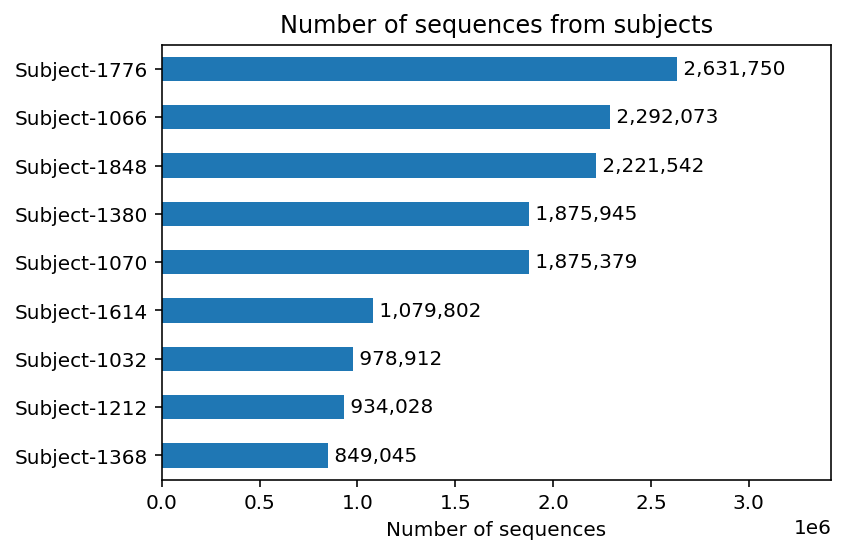

In [10]:
from bin.plotting import barplot

ax = barplot(data['Subject'].value_counts(), title='Number of sequences from subjects');
ax.set(xlabel='Number of sequences');

### Sequences lengths

In [11]:
import seaborn as sns
import numpy as np

def lengths_plot(data, target, title):
    lengths = data[target].str.len()

    ax = sns.distplot(lengths, bins=np.arange(lengths.min(), lengths.max() + 1), kde_kws={'bw':1})
    ax.set_title(title)
    ax.set(xlabel='Length')

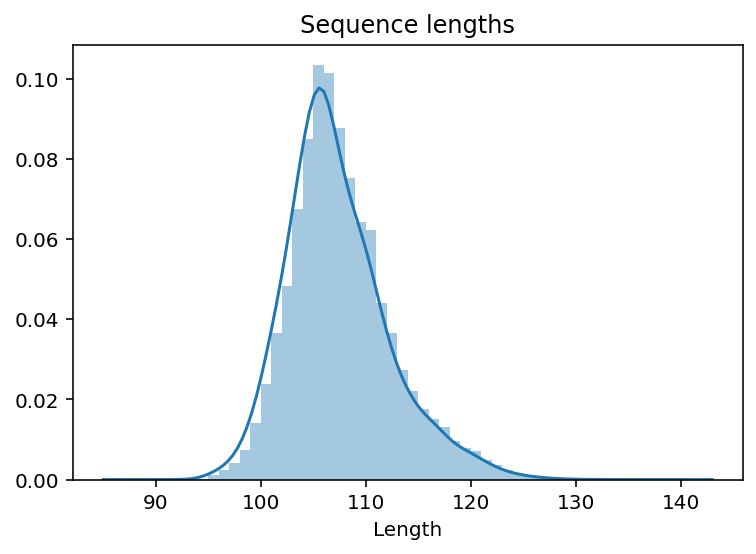

In [12]:
lengths_plot(data, 'seq', 'Sequence lengths')

In [13]:
from matplotlib import pyplot as plt

def for_each_length_plots(df, for_each_col, target, title):
    for_each_values = df[for_each_col].unique()

    for for_each in for_each_values:
        lengths_plot(df[df[for_each_col] == for_each],  target, title.format(for_each))
        plt.show()

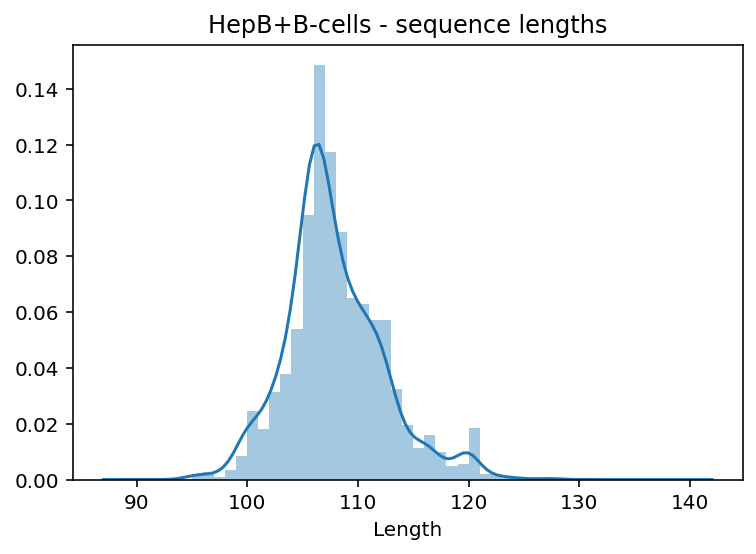

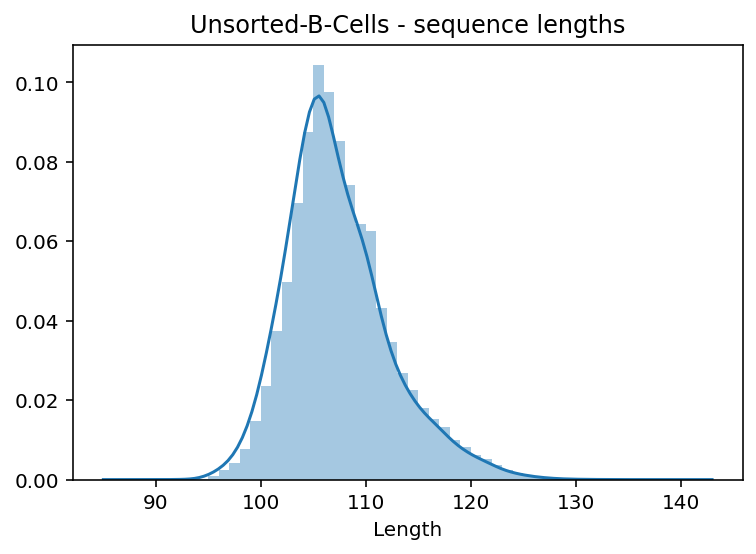

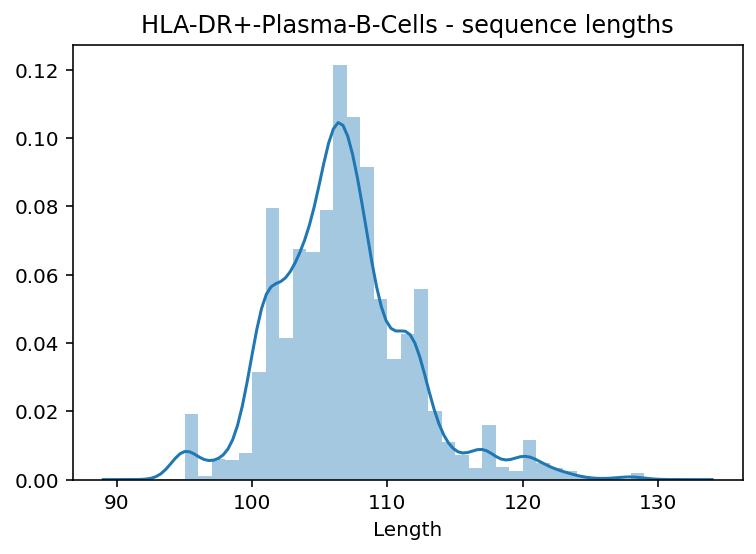

In [14]:
for_each_length_plots(data, 'BType', 'seq', '{} - sequence lengths')

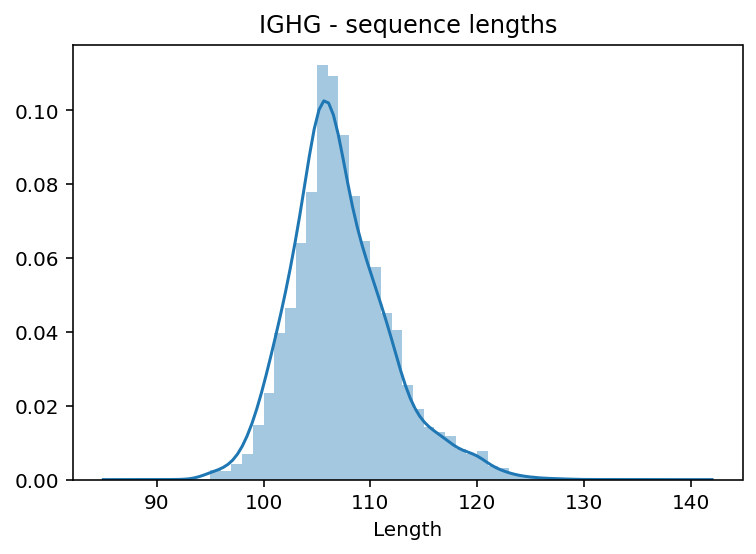

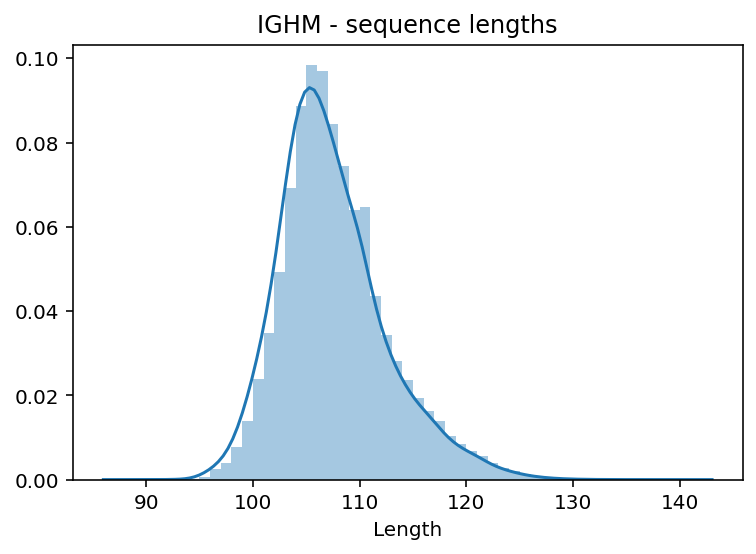

In [15]:
for_each_length_plots(data, 'Isotype', 'seq', '{} - sequence lengths')

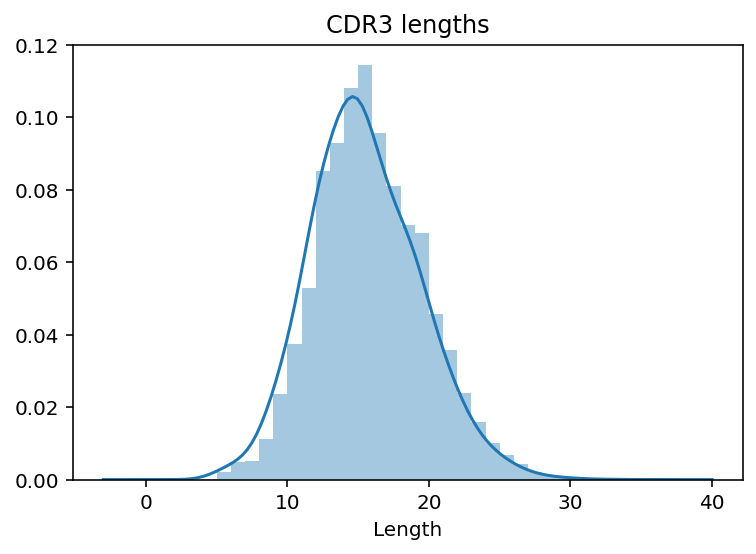

In [16]:
lengths_plot(data, 'cdr3', 'CDR3 lengths')

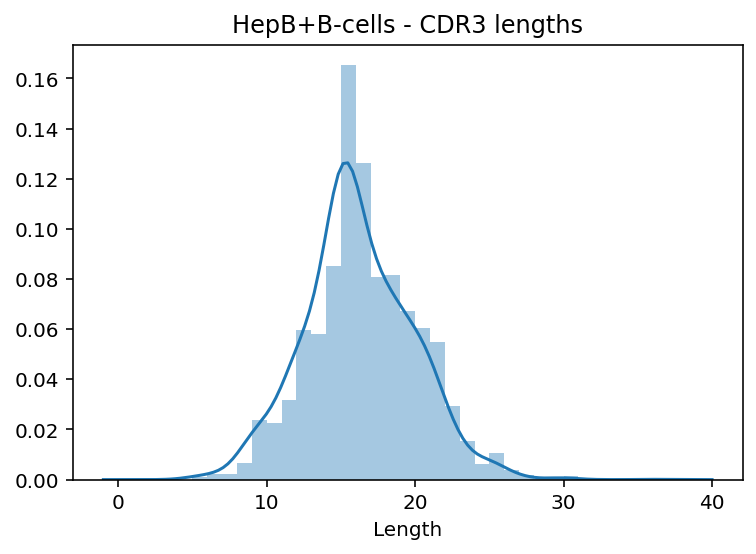

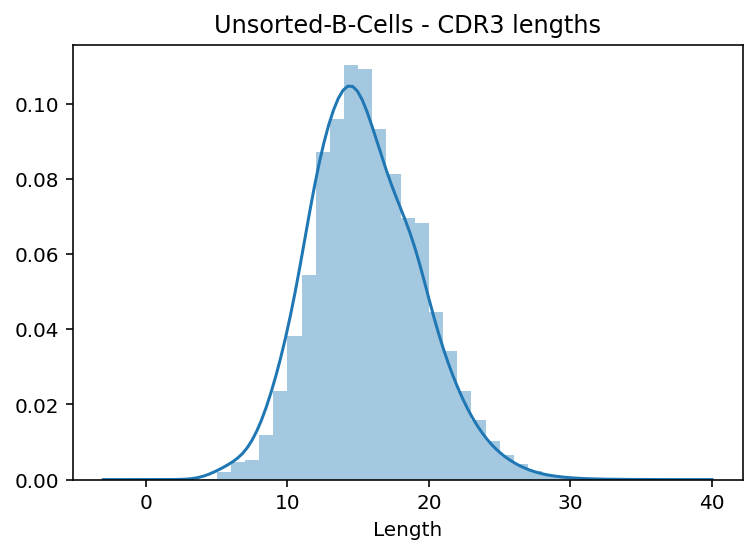

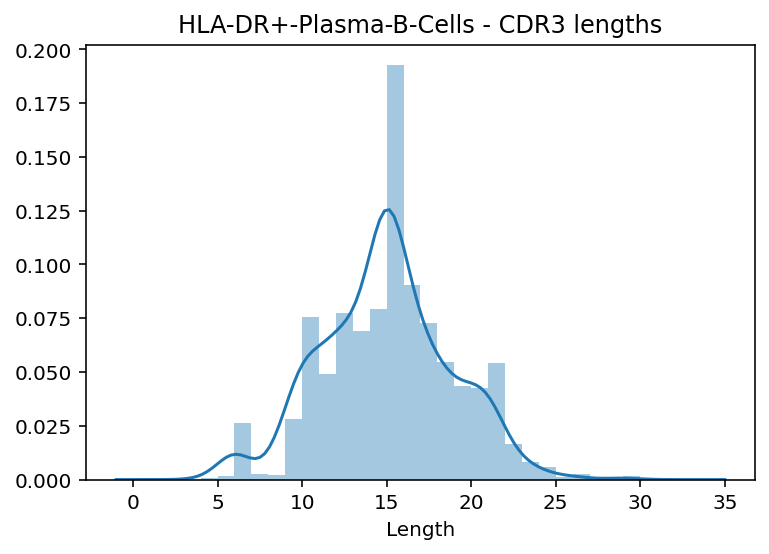

In [17]:
for_each_length_plots(data, 'BType', 'cdr3', '{} - CDR3 lengths')

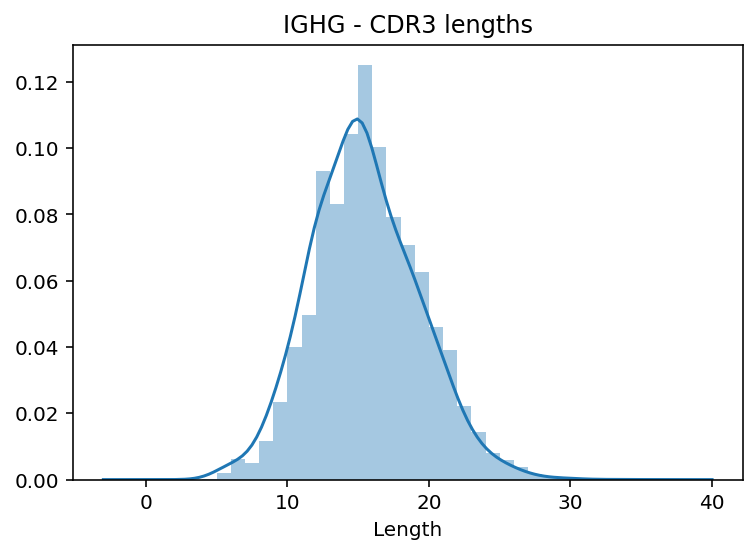

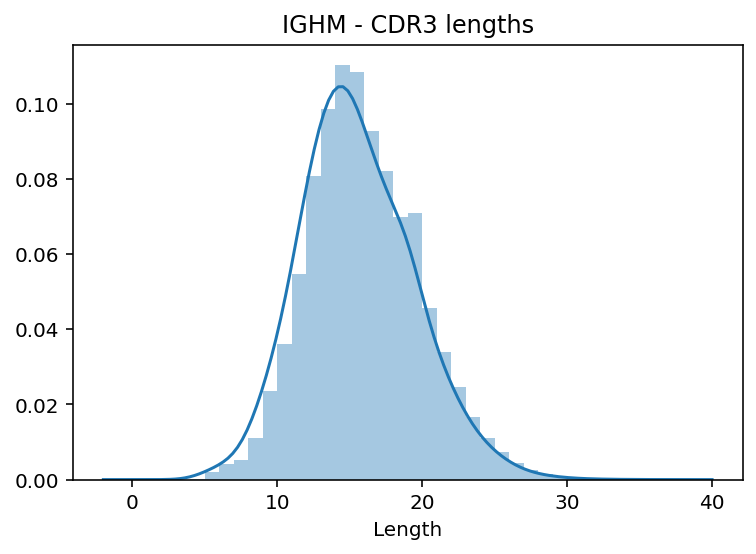

In [18]:
for_each_length_plots(data, 'Isotype', 'cdr3', '{} - CDR3 lengths')

### B-cell labels

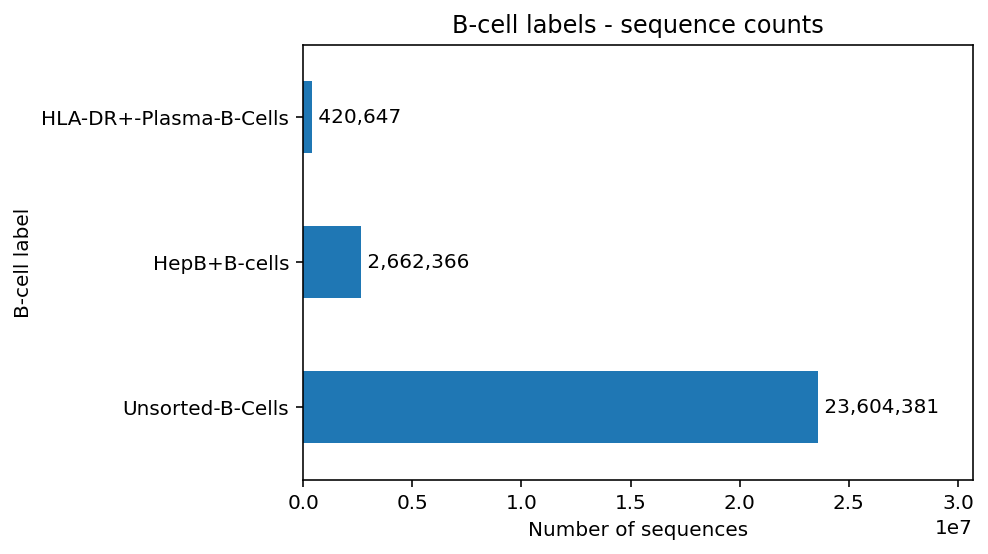

In [19]:
ax = barplot(metadata.groupby('BType')['Size'].sum(), title='B-cell labels - sequence counts');
ax.set(ylabel='B-cell label', xlabel='Number of sequences');

In [20]:
def count_plots(data, for_each_col, target, groupby_col):
    for_each_unique_values = sorted(data[for_each_col].unique())

    for for_each_val in for_each_unique_values:
        data_to_plot = data[data[for_each_col] == for_each_val].groupby(groupby_col)[target].sum()
        ax = barplot(data_to_plot, title=f'{for_each_val} - {groupby_col} counts');
        ax.set(xlabel='Number of sequences');
        plt.show()

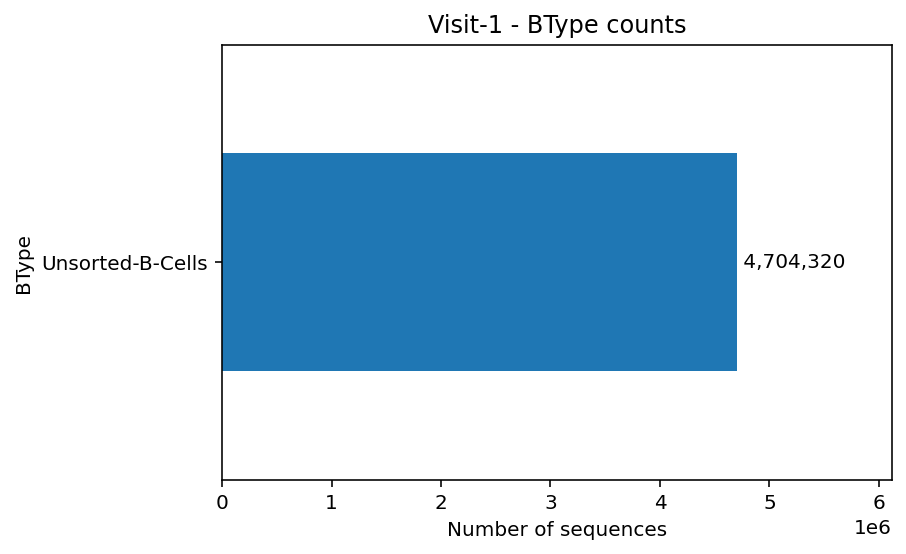

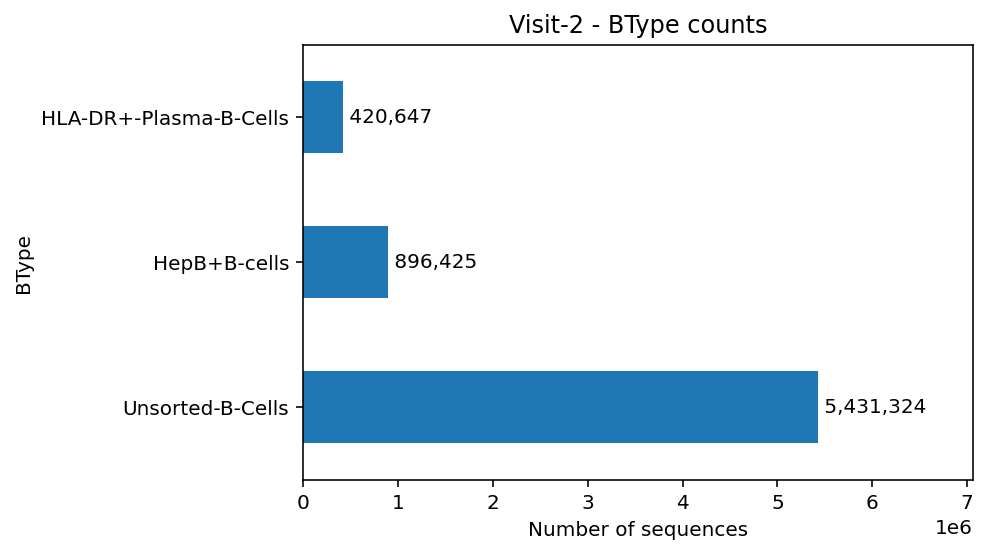

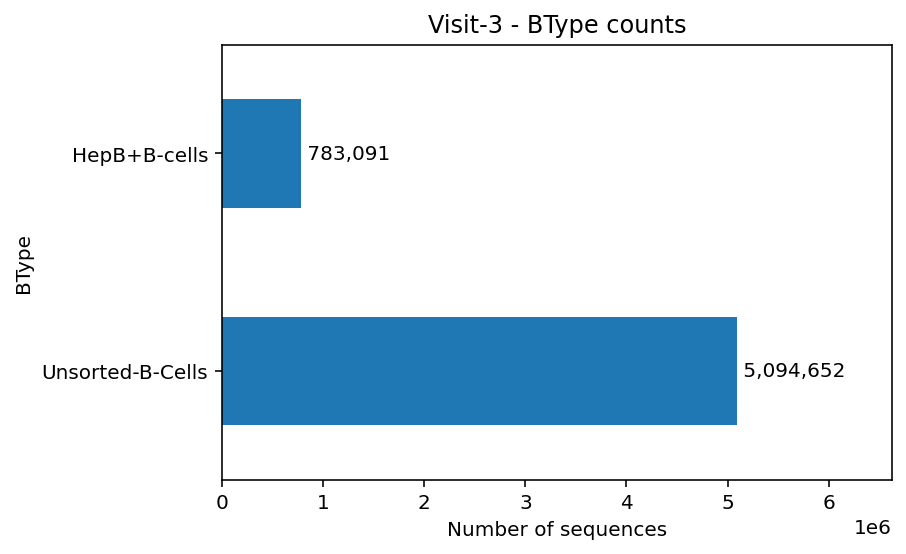

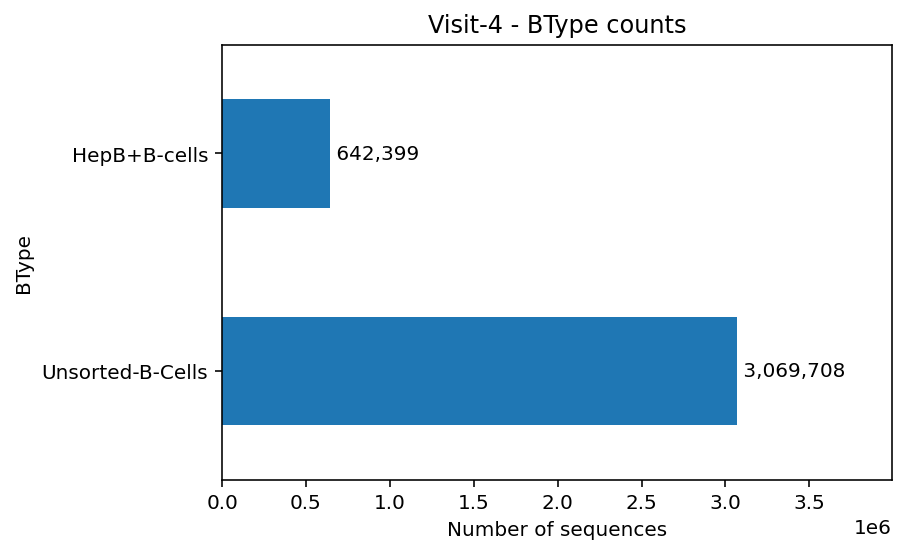

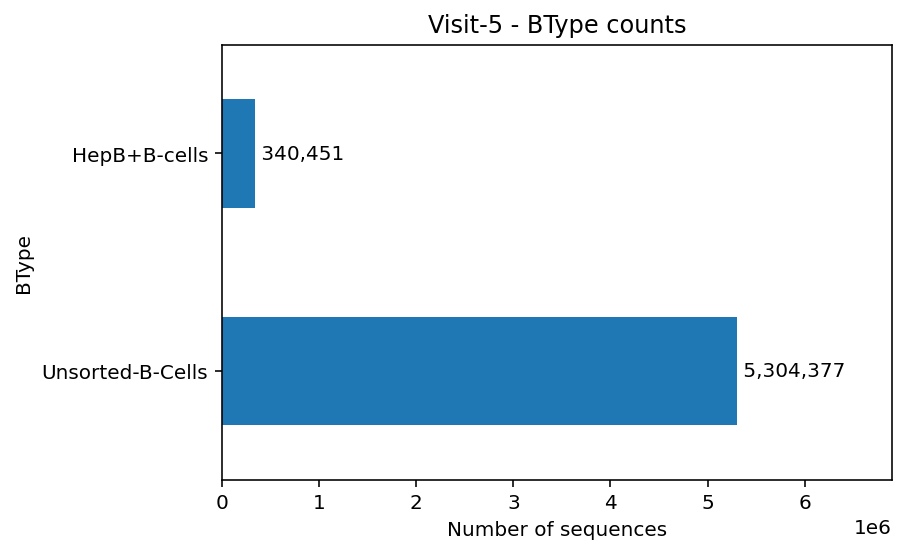

In [21]:
count_plots(metadata, 'Longitudinal', 'Size', 'BType')

### Subjects visits

In [22]:
def subject_visits_overview(df):
    df_groupby_subject = df.groupby('Subject')
    
    display(df_groupby_subject['Longitudinal'].unique())
    ax = barplot(df_groupby_subject['Longitudinal'].nunique(), title='Number of visits for subjects')
    ax.set(xlabel='Number of visits');

Subject
Subject-1032             [Visit-2, Visit-5, Visit-3, Visit-1]
Subject-1066    [Visit-2, Visit-4, Visit-5, Visit-3, Visit-1]
Subject-1070    [Visit-4, Visit-1, Visit-5, Visit-2, Visit-3]
Subject-1212             [Visit-1, Visit-5, Visit-3, Visit-2]
Subject-1368             [Visit-2, Visit-5, Visit-1, Visit-3]
Subject-1380    [Visit-1, Visit-3, Visit-4, Visit-2, Visit-5]
Subject-1614             [Visit-3, Visit-2, Visit-1, Visit-5]
Subject-1776    [Visit-2, Visit-1, Visit-3, Visit-4, Visit-5]
Subject-1848    [Visit-2, Visit-3, Visit-1, Visit-5, Visit-4]
Name: Longitudinal, dtype: object

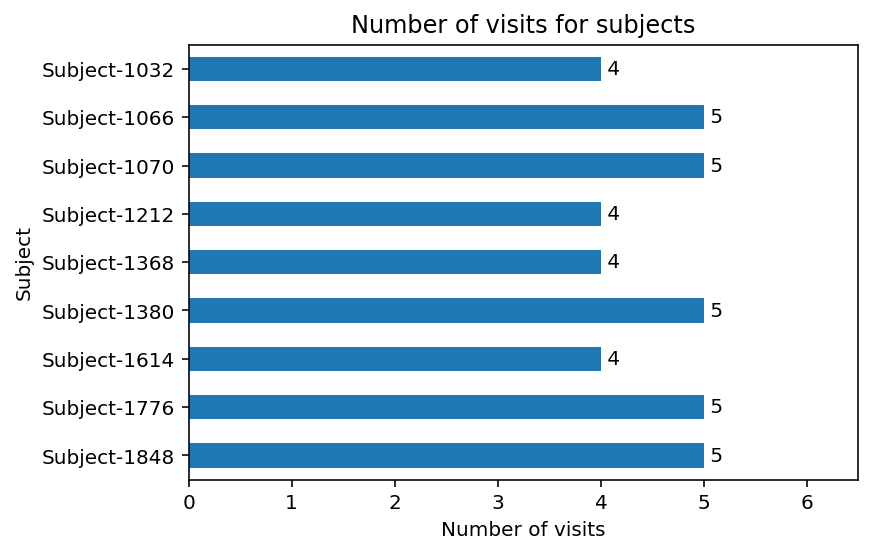

In [23]:
subject_visits_overview(data)

### hepB antibodies count

In [24]:
def subject_hepb_counts(df):
    df_groupby_subject = df.groupby('Subject')
    HEBP_TYPE = 'HepB+B-cells'
    ncols = 3
    nrows = int(np.ceil(df_groupby_subject.ngroups / ncols))
    
    _, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(6 * ncols, 4 * nrows), sharey=True)

    for (key, ax) in zip(df_groupby_subject.groups.keys(), axes.flatten()):
        subject = df_groupby_subject.get_group(key)

        visit_values = sorted(subject['Longitudinal'].unique())
        hepb_cnts = [len(subject[(subject['Longitudinal'] == visit) & (subject['BType'] == HEBP_TYPE)]) for visit in visit_values]

        sns.pointplot(visit_values, hepb_cnts, ax=ax)
        ax.set(title=key, ylabel='hepB ABs (symlog)', yscale='symlog')

    plt.tight_layout()
    plt.show()

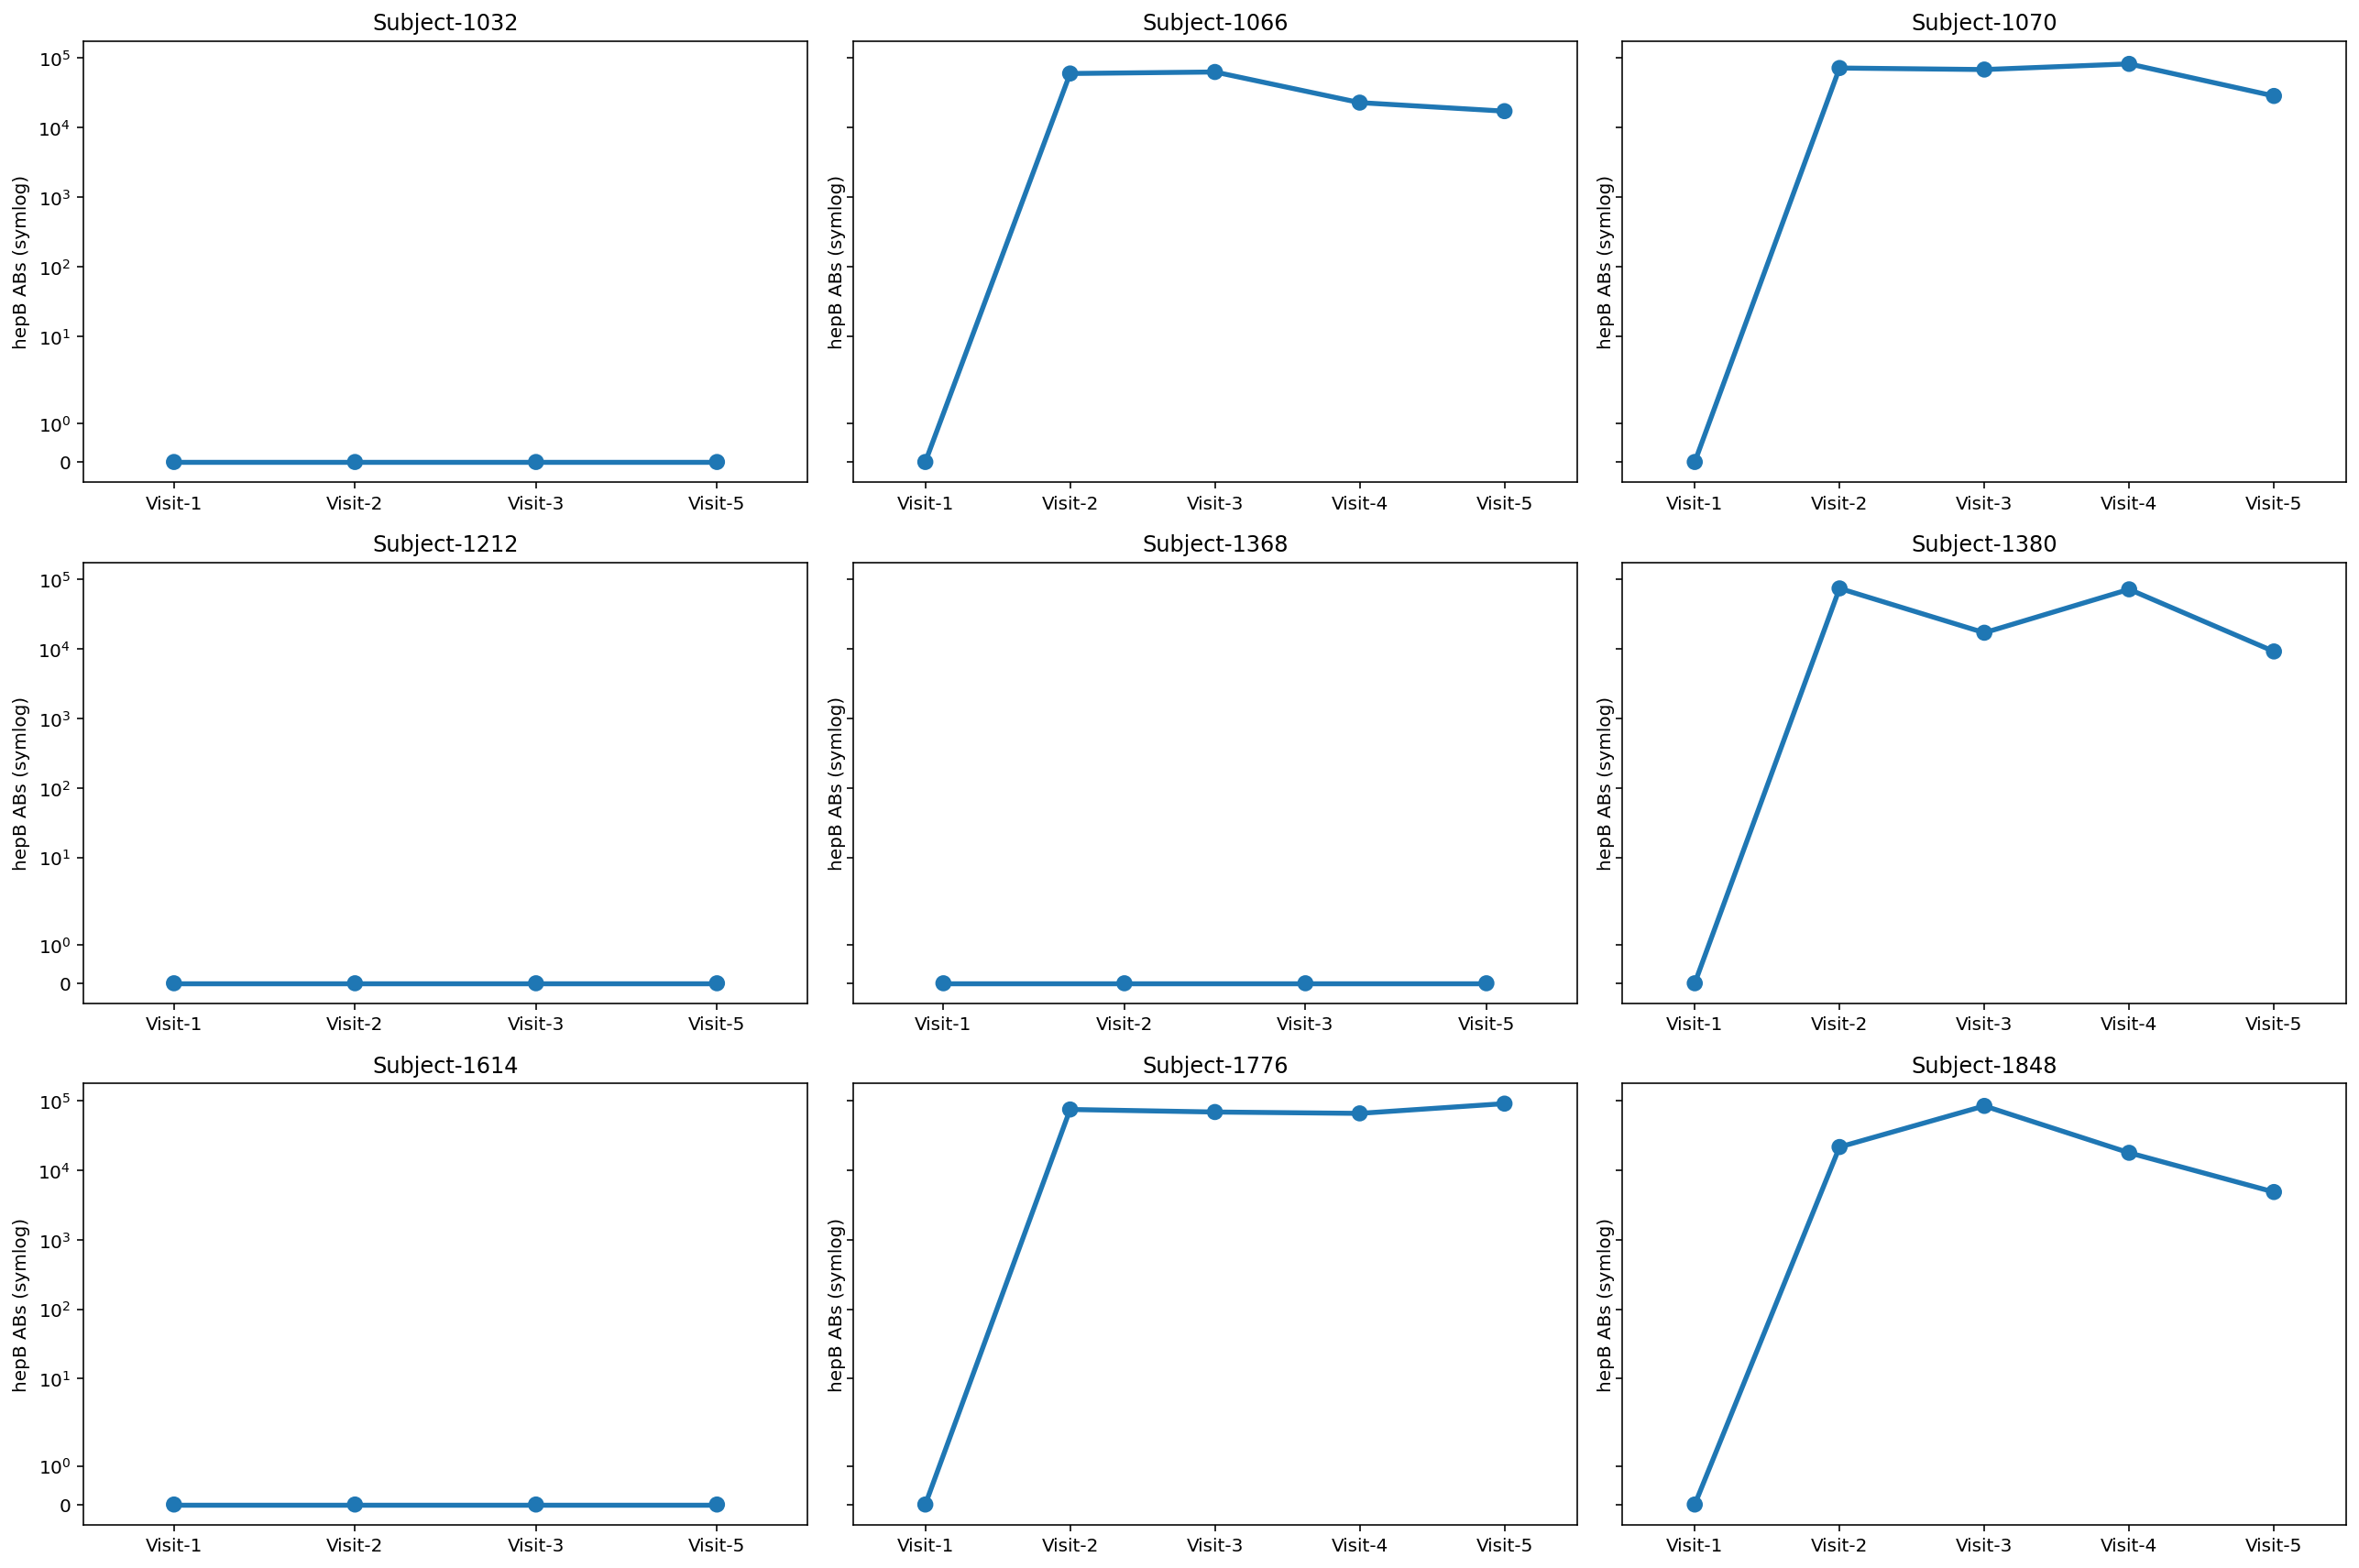

In [25]:
subject_hepb_counts(data)